
##**Description:**

This CSV dataset compiles a comprehensive range of socio-economic and health indicators, encompassing various regions and countries. It provides a snapshot of demographic trends, economic performance, and health outcomes over multiple years. The dataset comprises information such as country names,population religions. Health-related data includes suicide counts. Additionally, economic metrics such as GDP, GDP per capita and employment-population ratios are included. This dataset offers a rich resource for cross-sectional and longitudinal analyses, facilitating insights into the complex interplay between demographic, economic, and health factors across different regions and countries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import t
from sklearn.linear_model import LinearRegression

from google.colab import files
uploaded=files.upload()

Saving age_std_suicide_rates_1990-2022.csv to age_std_suicide_rates_1990-2022.csv


###**Reading the Data From a CSV file**


In [2]:
df=pd.read_csv("age_std_suicide_rates_1990-2022.csv")
df.head()

,CountryName,SuicideCount,Year,Population,GDP,GDPPerCapita,EmploymentPopulationRatio,Religions
0,Albania,47,1992,3247039.0,6.521750e+08,200.852220,45.315,Islam
1,Albania,73,1993,3227287.0,1.185315e+09,367.279225,47.798,Islam
2,Albania,52,1994,3207536.0,1.880951e+09,586.416135,50.086,Islam
3,Albania,91,1995,3187784.0,2.392765e+09,750.604449,53.186,Islam
4,Albania,92,1996,3168033.0,3.199641e+09,1009.977111,53.039,Islam


In [3]:
#The columns that we're going to work on
df.columns

Index(['CountryName', 'SuicideCount', 'Year', 'Population', 'GDP',
       'GDPPerCapita', 'EmploymentPopulationRatio', 'Religions'],
      dtype='object')

In [4]:
df['CountryName'].unique()

array(['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Cabo Verde', 'Canada',
       'Chile', 'China, Hong Kong SAR', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland',
       'France', 'Georgia', 'Germany', 'Greece', 'Guatemala', 'Guyana',
       'Hungary', 'Iceland', 'Iran (Islamic Republic of)', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'North Macedonia', 'Norway', 'Oman',
       'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Qatar', 'Rep

# **Filtering Data**

Upon reviewing the dataset, it was observed that certain countries lack recent data, which can impact the accuracy and reliability of our analysis. To address this issue, we decided to filter the dataset to include only those countries that have consistent and comprehensive data from 2018 onwards. This filtering ensures that our analysis is based on the most up-to-date and complete information available, thereby improving the validity of our findings. By focusing on countries with continuous data over the specified period, we can better understand trends and make more informed conclusions about the relationships between various factors.

In [5]:
df_recent = df[df['Year'] >= 2018]

In [6]:
df_recent["CountryName"].unique()

array(['Armenia', 'Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guatemala',
       'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lebanon', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives',
       'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro',
       'Netherlands', 'Nicaragua', 'North Macedonia', 'Oman', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Republic of Korea', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Serbia', 'Singapore',
       'Slovakia', 'Slovenia', 'South Africa', 'S

#**Hypothesis 1:**
There is a relationship between a country's GDP per capita and its suicide rate. Specifically, countries with lower GDP per capita may exhibit higher suicide rates due to economic hardships, while countries with higher GDP per capita may have lower suicide rates due to better economic conditions and access to mental health resources.

In [7]:
# @title Data for countries from 2018 to 2021
df_filtered = df[df['Year'].between(2018, 2021)]
countries_with_all_years_only = df_filtered.groupby('CountryName').filter(
    lambda x: set(x['Year']) == {2018, 2019, 2020, 2021}
)
countries_with_all_years_only

,CountryName,SuicideCount,Year,Population,GDP,GDPPerCapita,EmploymentPopulationRatio,Religions
41,Armenia,59,2018,2836557.0,1.245794e+10,4391.923270,53.592,Christianity
42,Armenia,49,2019,2820602.0,1.361929e+10,4828.504886,55.218,Christianity
43,Armenia,41,2020,2805608.0,1.264170e+10,4505.867742,54.556,Christianity
44,Armenia,53,2021,2790974.0,1.387891e+10,4972.783204,56.445,Christianity
73,Australia,3205,2018,24963258.0,1.430000e+12,57273.520480,62.161,Christianity
...,...,...,...,...,...,...,...,...
2168,Switzerland,1008,2021,8704546.0,8.130000e+11,93446.434450,63.944,Christianity
2320,United States of America,48344,2018,326838199.0,2.050000e+13,62823.309440,59.940,Christianity
2321,United States of America,47511,2019,328329953.0,2.140000e+13,65120.394660,60.329,Christianity
2322,United States of America,45979,2020,331511512.0,2.110000e+13,63528.634300,56.380,Christianity


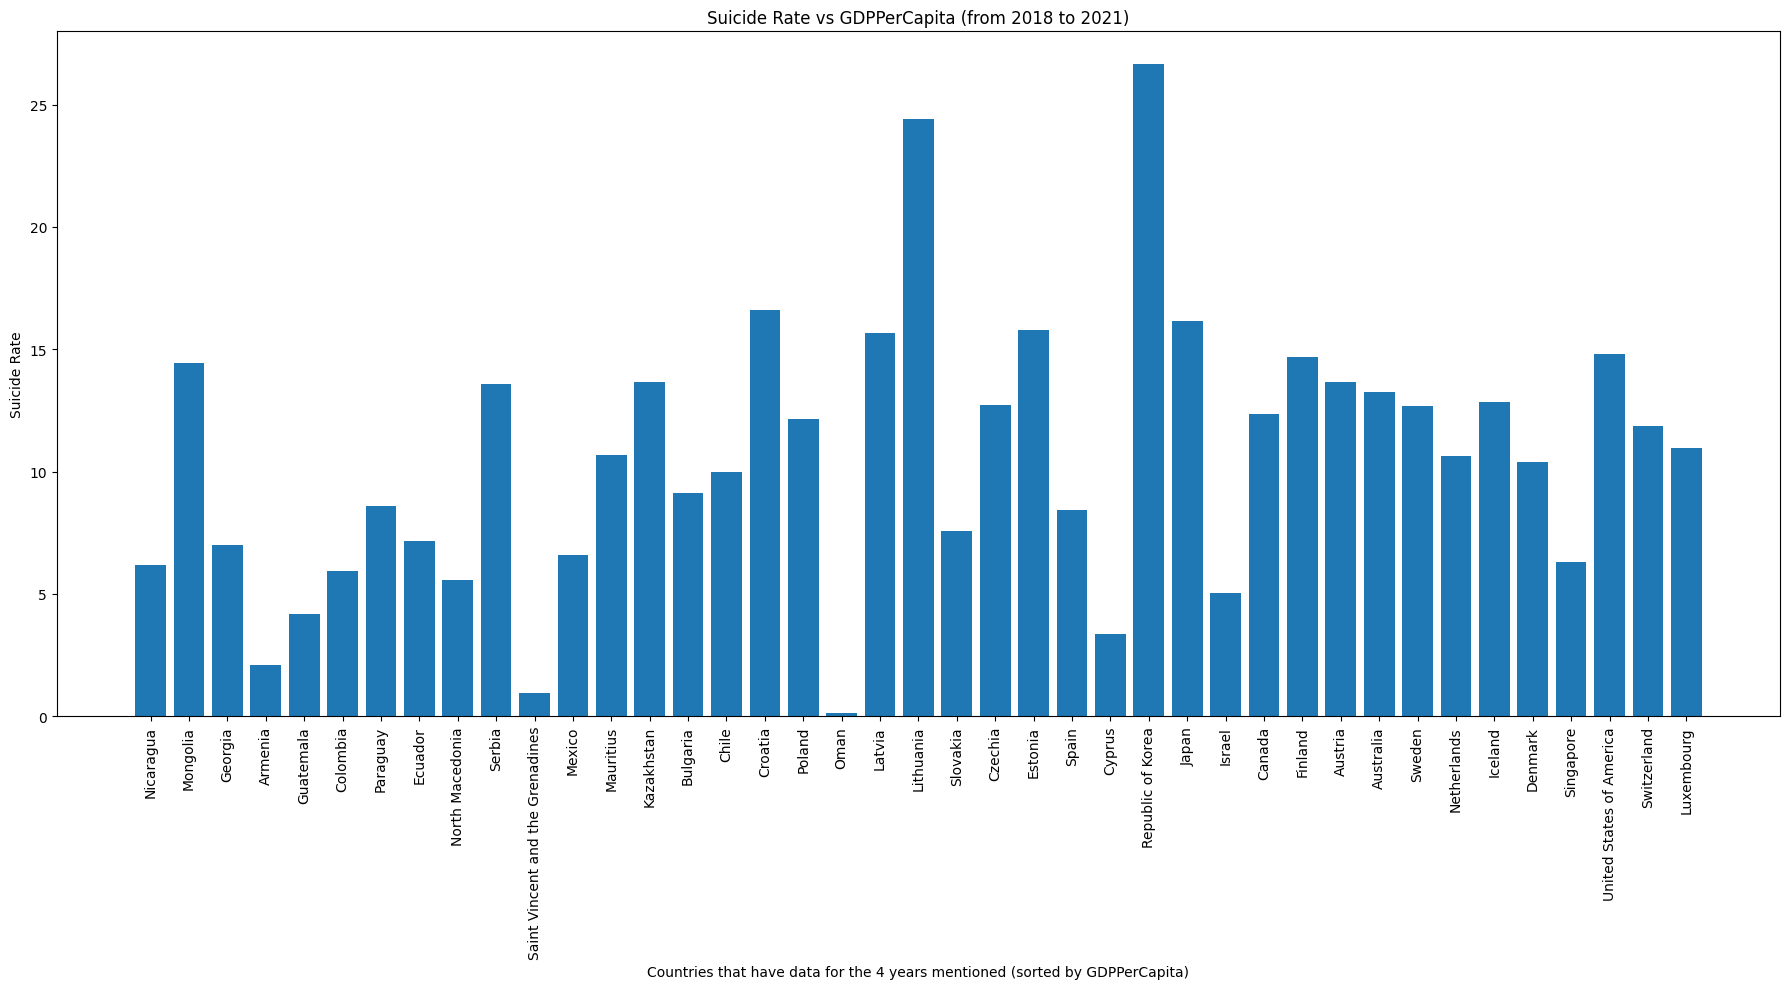

In [8]:
countries_with_all_years_only['SuicideRate'] = (countries_with_all_years_only['SuicideCount'] / countries_with_all_years_only['Population']) * 100000
# Sort data by GDP in descending order
sorted_data = countries_with_all_years_only.sort_values(by='GDPPerCapita', ascending=True)

# Plot bar chart
plt.figure(figsize=(18, 10))
# Set the background color to black
#plt.gca().set_facecolor('black')
#plt.gcf().set_facecolor('black')

# Plot the bars with the desired color
plt.bar(sorted_data['CountryName'], sorted_data['SuicideRate'])

# Set the text colors to white for better contrast with the black background
plt.xlabel('Countries that have data for the 4 years mentioned (sorted by GDPPerCapita)')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate vs GDPPerCapita (from 2018 to 2021)')
plt.xticks(rotation=90)
#plt.yticks(color='white')

# Ensure layout is tight to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()

##**Observations**
1-Variation in Suicide Rates: The bar plot shows considerable variation in suicide rates among different countries, regardless of their GDP per capita.

2-High Suicide Rates in Some Economically Strong Countries: Some countries with relatively high GDP per capita, such as Japan and Finland, have high suicide rates, indicating that economic wealth alone does not prevent high suicide
rates.

3-Low Suicide Rates in Some Economically Weaker Countries: Conversely, some countries with lower GDP per capita, such as Nicaragua and Georgia, have lower suicide rates.

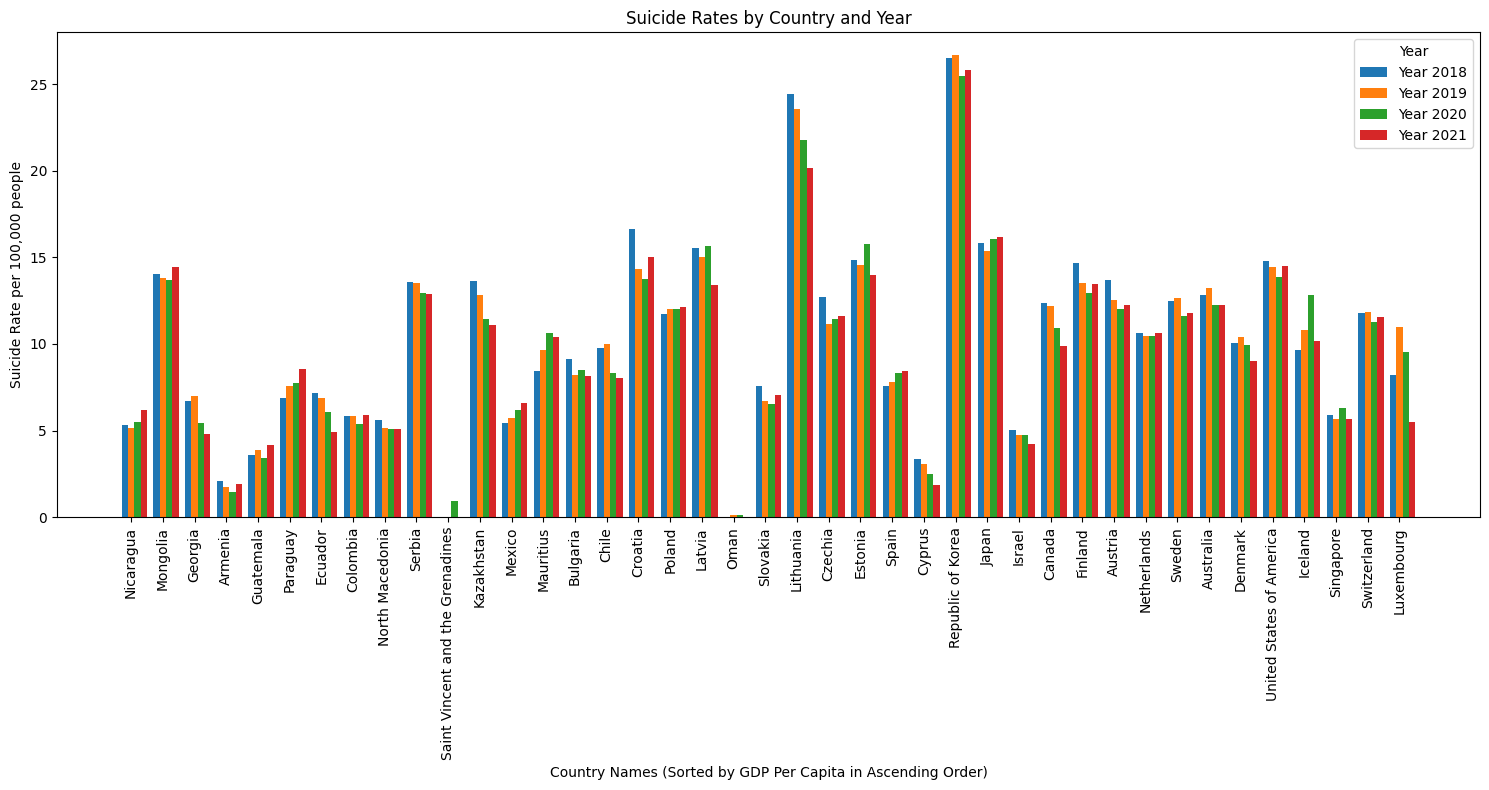

In [9]:
sorted_countries = countries_with_all_years_only.groupby('CountryName')['GDPPerCapita'].mean().sort_values().index

# Organize the data for plotting
bar_data = {}
for year in range(2018, 2021 + 1):
    year_data = countries_with_all_years_only[countries_with_all_years_only['Year'] == year]
    year_data = year_data.set_index('CountryName').reindex(sorted_countries).reset_index()
    bar_data[year] = year_data[['CountryName', 'SuicideRate']]

# Plotting
num_countries = len(sorted_countries)
bar_width = 0.2
index = np.arange(num_countries)

plt.figure(figsize=(15, 8))

for i, year in enumerate(range(2018, 2021 + 1)):
    plt.bar(index + i * bar_width, bar_data[year]['SuicideRate'], bar_width, label=f'Year {year}')

plt.xlabel('Country Names (Sorted by GDP Per Capita in Ascending Order)')
plt.ylabel('Suicide Rate per 100,000 people')
plt.title('Suicide Rates by Country and Year')
plt.xticks(index + bar_width, sorted_countries, rotation=90)
plt.legend(title='Year')
plt.tight_layout()

plt.show()

##**Observation**
The suicide rate varies significantly across different countries.

Some countries show consistent trends in suicide rates over the years (e.g., steadily increasing or decreasing), while others show fluctuations.

In [10]:
GDPPerCapita=countries_with_all_years_only["GDPPerCapita"]
SuicideRate=countries_with_all_years_only["SuicideRate"]

correlation_coefficient_GDPPerCapita_VS_SuicideRate = np.corrcoef(GDPPerCapita, SuicideRate)[0, 1]

# Calculate the degrees of freedom
n = len(GDPPerCapita)
degrees_of_freedom = n - 2

# Calculate the t-statistic
t_statistic = correlation_coefficient_GDPPerCapita_VS_SuicideRate * math.sqrt(degrees_of_freedom / (1 - correlation_coefficient_GDPPerCapita_VS_SuicideRate ** 2))

# Calculate the p-value
p_value_GDPPerCapita_VS_SuicideRate = 2 * (1 - t.cdf(abs(t_statistic), degrees_of_freedom))


In [11]:
correlation_coefficient_GDPPerCapita_VS_SuicideRate

0.20052262189579176

In [12]:
p_value_GDPPerCapita_VS_SuicideRate

0.010038386405989641

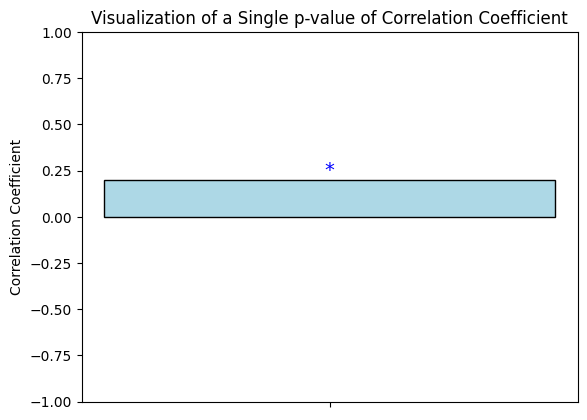

In [13]:
alpha=0.05
# Creating the plot
fig, ax = plt.subplots()

# Bar plot for the correlation coefficient
ax.bar(1, correlation_coefficient_GDPPerCapita_VS_SuicideRate, color='lightblue', edgecolor='black', width=0.5)

# Adding an asterisk if the p-value is less than the alpha value
if p_value_GDPPerCapita_VS_SuicideRate < alpha:
    ax.text(1, correlation_coefficient_GDPPerCapita_VS_SuicideRate, '*', ha='center', va='bottom', color='blue', fontsize=14)

# Setting the x-axis and y-axis labels and limits
ax.set_xticks([1])
ax.set_xticklabels([''])
ax.set_ylim(-1, 1)
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Visualization of a Single p-value of Correlation Coefficient')

# Display the plot
plt.show()

##**Observation**

The calculated correlation coefficient is approximately 0.2005, indicating a weak positive correlation between GDP per capita and suicide rate.
The computed p-value is approximately 0.0108.
This p-value is less than the typical alpha level of 0.05, suggesting that the correlation between GDP per capita and suicide rate is statistically significant.


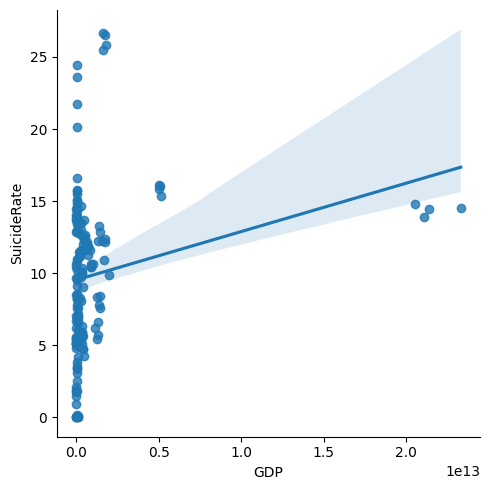

In [14]:
countries_with_all_years_only['SuicideRate'] = (countries_with_all_years_only['SuicideCount'] / countries_with_all_years_only['Population']) * 100000

# Create the lmplot with customized scatter and line colors
sns.lmplot(x='GDP', y='SuicideRate',
           data=countries_with_all_years_only)

# Adjust text color
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'

# Set the background color of the current axes
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")

# Display the plot
plt.show()

##**Observation**

There is a positive correlation between GDP and suicide rate, meaning that as GDP increases, the suicide rate tends to increase slightly.

Most data points are clustered at lower GDP values, indicating that a majority of countries have lower GDP.

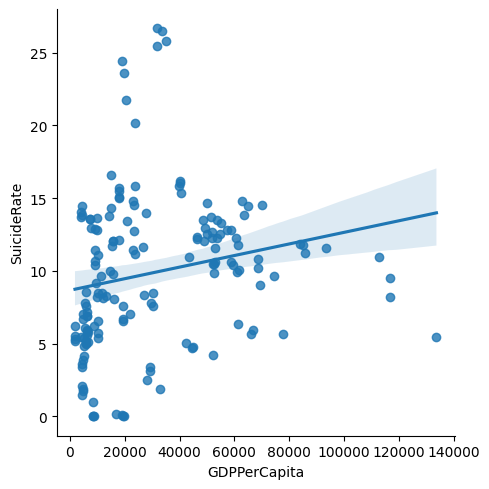

In [15]:
# Create the lmplot with customized scatter and line colors
sns.lmplot(x='GDPPerCapita', y='SuicideRate',
           data=countries_with_all_years_only)

# Set the background color and edge color
plt.gca().set_facecolor("white")  # Set the facecolor of the current axes



# Set the background color of the figure
plt.gcf().set_facecolor("white")

# Display the plot
plt.show()

##**Observation**
There is a slight positive correlation between GDP per capita and suicide rate. This suggests that as the GDP per capita increases, the suicide rate tends to increase slightly.
Most data points are clustered at lower GDP per capita values, indicating that the majority of countries have a lower GDP per capita.


# **Conculsion 1 :**
The slight positive correlation between GDP per capita and suicide rates, along with the positive correlation between GDP and suicide rates, indicates that economic factors play a role in influencing suicide rates. However, given the clustering of data points at lower GDP and GDP per capita values, it is evident that economic prosperity alone does not fully explain variations in suicide rates.

To develop a more nuanced understanding, it is essential to consider other socio-economic factors such as employment rates. Investigating the relationship between employment rates and suicide rates may provide further insights into how economic conditions affect suicide rates globally. This holistic approach can help in formulating more effective policies aimed at reducing suicide rates by addressing multiple aspects of economic and social well-being.

# **Hypothesis 2:**
we investigated the relationship between the employment rate and suicide counts. The assumption was that higher employment rates would be associated with lower suicide rates due to increased economic stability and personal well-being from gainful employment.
 so that so dicide that our second hypothesis will be : Is there a significant positive relationship between the employment rate and the suicide rate across different countries

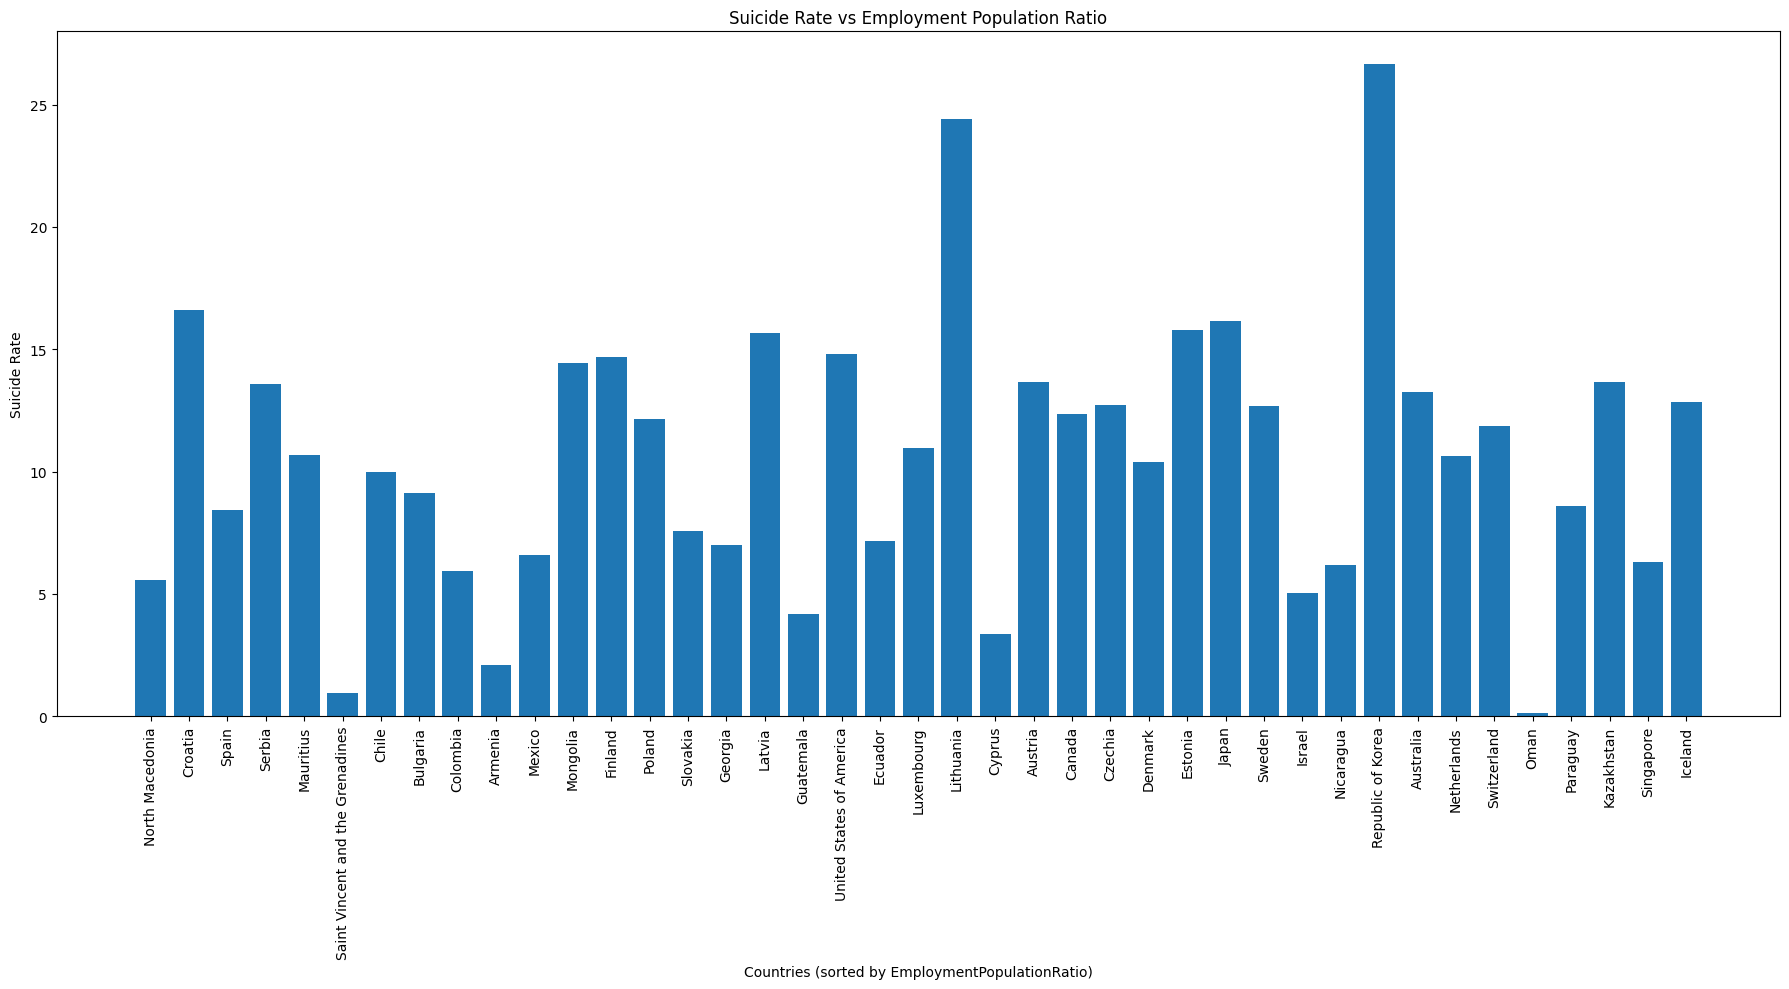

In [16]:
# Calculate suicide rates
countries_with_all_years_only['SuicideRate'] = (countries_with_all_years_only['SuicideCount'] / countries_with_all_years_only['Population']) * 100000

# Sort data by EmploymentPopulationRatio in ascending order
sorted_data = countries_with_all_years_only.sort_values(by='EmploymentPopulationRatio', ascending=True)


# Create the bar plot
plt.figure(figsize=(18, 10))
plt.bar(sorted_data['CountryName'], sorted_data['SuicideRate'])

# Add labels and title with adjusted colors
plt.xlabel('Countries (sorted by EmploymentPopulationRatio)')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate vs Employment Population Ratio')
plt.xticks(rotation=90)
plt.yticks(color='black')
plt.tight_layout()

# Set the background color of the current axes
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
# Display the plot
plt.show()

###**Observation**
1-Variability: There is significant variability in suicide rates across different countries. Some countries with similar employment population ratios have vastly different suicide rates.

2- High Suicide Rates in Some Countries: Countries like Lithuania and Kazakhstan show high suicide rates compared to others.

3-Low Suicide Rates in Some Countries: Countries like Cyprus and Israel have relatively low suicide rates.

4-Mid-Range Employment vs. Suicide Rates: Countries with mid-range employment ratios (like Spain and Poland) have varied suicide rates, indicating other factors may play a role.

5-Potential Anomalies: Countries like Japan and Republic of Korea have both high employment ratios and high suicide rates, suggesting cultural or social factors might significantly influence these rates.

6-Group Patterns: European countries tend to have a wider range of suicide rates, whereas countries in other regions may exhibit more consistency.

7-Luxembourg and Guatemala: These countries show some of the lowest suicide rates despite their employment ratios, suggesting potential outliers or unique mitigating factors in these nations.



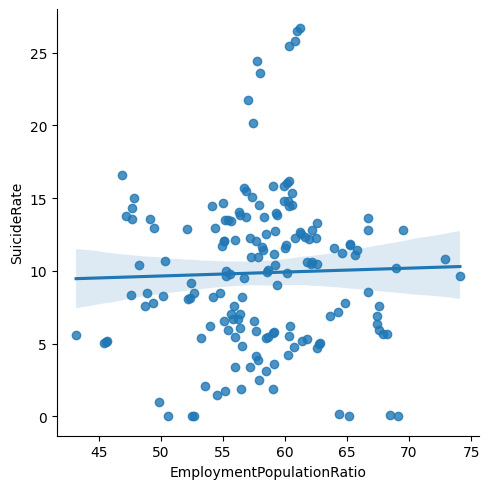

In [17]:
# Create the lmplot with customized scatter and line colors
sns.lmplot(x='EmploymentPopulationRatio', y='SuicideRate',
           data=countries_with_all_years_only)

# Set the background color of the current axes
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
# Display the plot
plt.show()

##**Observation**
The analysis shows that as the employment ratio increases, so do suicide rates. This surprising result suggests that having a job doesn't always reduce the risk of suicide. Factors like job stress, dissatisfaction at work, and financial pressures could be contributing to this. High employment rates might mean more work-related stress, fear of losing the job, and economic worries, which can worsen mental health. The pressure to perform well at work and meet expectations can lead to feelings of inadequacy and hopelessness, increasing the risk of suicide. This finding highlights the need to look closely at job quality and its impact on mental health, rather than assuming that having a job is always beneficial for mental well-being.


In [23]:
EmploymentPopulationRatio=countries_with_all_years_only["EmploymentPopulationRatio"]
SuicideRate=countries_with_all_years_only["SuicideRate"]

correlation_coefficient_EmploymentPopulationRatio_VS_SuicideRate = np.corrcoef(EmploymentPopulationRatio, SuicideRate)[0, 1]

# Calculate the degrees of freedom
n = len(EmploymentPopulationRatio)
degrees_of_freedom = n - 2

# Calculate the t-statistic
t_statistic = correlation_coefficient_EmploymentPopulationRatio_VS_SuicideRate * math.sqrt(degrees_of_freedom / (1 - correlation_coefficient_EmploymentPopulationRatio_VS_SuicideRate ** 2))

# Calculate the p-value
p_value_EmploymentPopulationRatio_VS_SuicideRate = 2 * (1 - t.cdf(abs(t_statistic), degrees_of_freedom))


In [24]:
correlation_coefficient_EmploymentPopulationRatio_VS_SuicideRate

0.028626948533552275

In [25]:
p_value_EmploymentPopulationRatio_VS_SuicideRate

0.7159518573176951

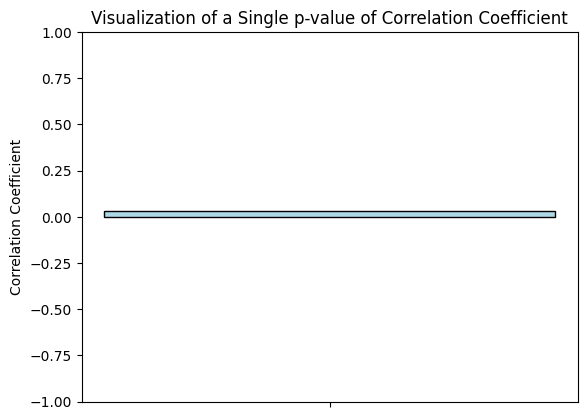

In [26]:
alpha=0.05
# Creating the plot
fig, ax = plt.subplots()

# Bar plot for the correlation coefficient
ax.bar(1, correlation_coefficient_EmploymentPopulationRatio_VS_SuicideRate, color='lightblue', edgecolor='black', width=0.5)

# Adding an asterisk if the p-value is less than the alpha value
if p_value_EmploymentPopulationRatio_VS_SuicideRate < alpha:
    ax.text(1, correlation_coefficient_EmploymentPopulationRatio_VS_SuicideRate, '*', ha='center', va='bottom', color='blue', fontsize=14)

# Setting the x-axis and y-axis labels and limits
ax.set_xticks([1])
ax.set_xticklabels([''])
ax.set_ylim(-1, 1)
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Visualization of a Single p-value of Correlation Coefficient')

# Display the plot
plt.show()

###**Observation**
The graph shows the visualization of the correlation coefficient for the relationship between employment-population ratio and suicide rate. The correlation coefficient is 0.0286, which is very close to 0, indicating a negligible linear relationship between the two variables.

The p-value of 0.716 is much higher than the common significance level of 0.05, suggesting that the correlation is not statistically significant. This implies that there is no strong evidence to conclude that the employment-population ratio is associated with the suicide rate in a meaningful way

# **Conclusion 2:**
The analysis of the relationship between employment ratios and suicide rates reveals several key insights. Although there appears to be a slight positive correlation, the correlation coefficient of 0.0286 is very weak, and the p-value of 0.716 indicates that this correlation is not statistically significant. Therefore, we cannot confidently conclude that higher employment ratios are associated with higher suicide rates. The lack of statistical significance suggests that the relationship observed may be due to random variation rather than a meaningful connection. This finding underscores the importance of considering other factors, such as job quality, mental health support, and cultural influences, which might play more significant roles in influencing suicide rates.

# **Hypothesis 3:**
We investigated the relationship between the religion, GDP per capita, and suicide rates across different countries.We hypothesized that the religion in a country might influence societal norms and attitudes towards mental health, thereby affecting suicide rates

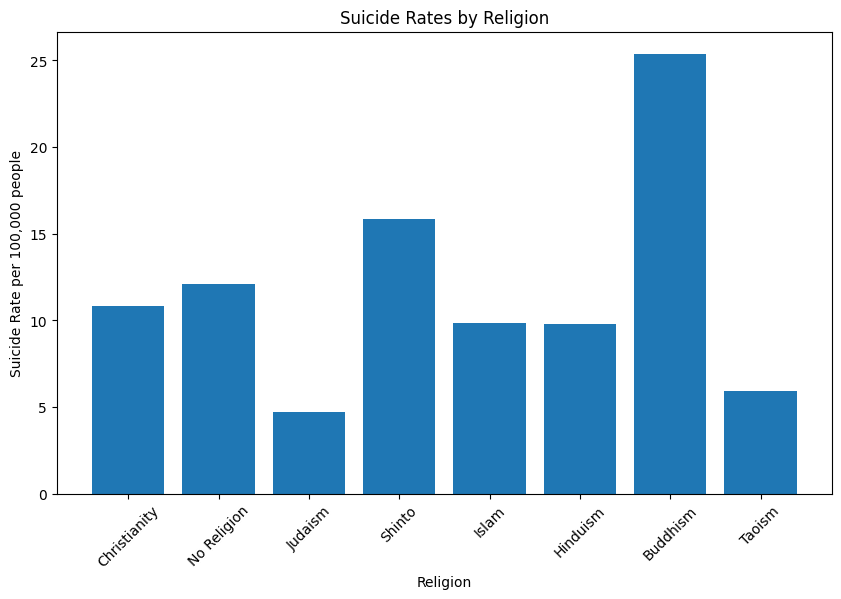

In [18]:
religions = ["Christianity", "No Religion", "Judaism", "Shinto", "Islam", "Hinduism", "Buddhism", "Taoism"]

# Dictionary to store suicide rates
suicide_rates = {}

for religion in religions:
    religion_countries = countries_with_all_years_only[countries_with_all_years_only["Religions"] == religion]
    total_suicide_count = religion_countries['SuicideCount'].sum()
    total_population = religion_countries['Population'].sum()


    suicide_rate = (total_suicide_count / total_population) * 100000
    suicide_rates[religion] = suicide_rate

# Convert dictionary to lists for plotting
religions_list = list(suicide_rates.keys())
suicide_rate_list = list(suicide_rates.values())


# Convert dictionary to lists for plotting
religions_list = list(suicide_rates.keys())
suicide_rate_list = list(suicide_rates.values())



# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars with black background
bars = ax.bar(religions_list, suicide_rate_list)



# Add title and labels with adjusted colors
ax.set_title('Suicide Rates by Religion')
ax.set_xlabel('Religion')
ax.set_ylabel('Suicide Rate per 100,000 people')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")

# Display the plot
plt.show()

##**Observation**


The graph displays suicide rates per 100,000 people across different religions. Here are the key observations:

Buddhism: Shows the highest suicide rate, significantly higher than other religions, indicating a potential area for further investigation into cultural or social factors.

Shinto: Also has a relatively high suicide rate, second only to Buddhism.

Judaism: Exhibits the lowest suicide rate among the religions shown.

Christianity and No Religion: Both have similar, moderate suicide rates.

Islam and Hinduism: Both have relatively low suicide rates, comparable to each other.

Taoism: Has a lower suicide rate, similar to Judaism.

These observations highlight that different religious groups exhibit varying suicide rates, suggesting that cultural, social, and community support factors associated with these religions might influence suicide rates.


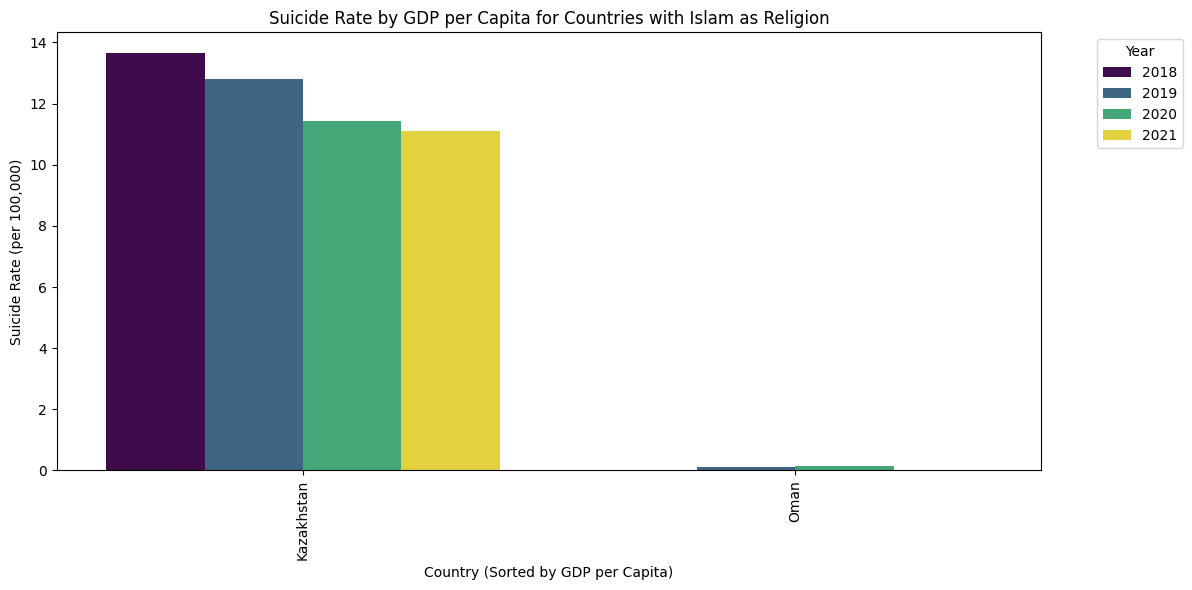

In [19]:
grouped_by_islam = countries_with_all_years_only[countries_with_all_years_only['Religions'] == "Islam"]

# Sort countries within the group based on average GDP per capita
sorted_countries = grouped_by_islam.groupby('CountryName')['GDPPerCapita'].mean().sort_values().index


# Plot the bar graph for the filtered group
plt.figure(figsize=(12, 6))
sns.barplot(x='CountryName', y='SuicideRate', hue='Year', data=grouped_by_islam, order=sorted_countries, palette='viridis')
plt.title('Suicide Rate by GDP per Capita for Countries with Islam as Religion')
plt.xlabel('Country (Sorted by GDP per Capita)')
plt.ylabel('Suicide Rate (per 100,000)')
plt.xticks(rotation=90)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.tight_layout()
plt.show()

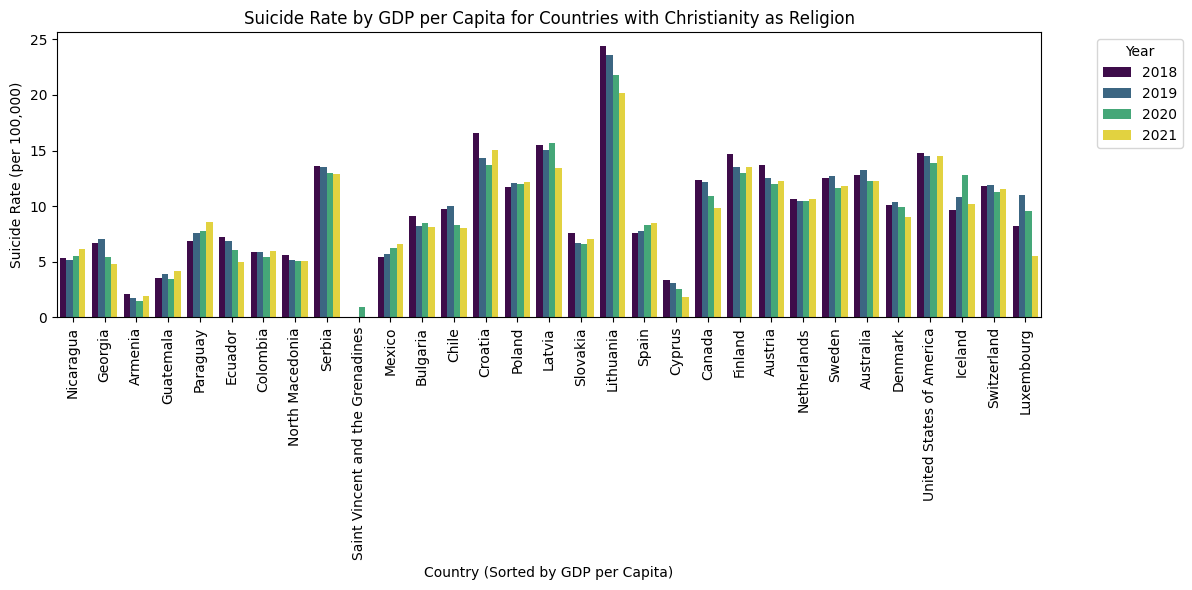

In [20]:
grouped_by_christianity = countries_with_all_years_only[countries_with_all_years_only['Religions'] == "Christianity"]

# Sort countries within the group based on average GDP per capita
sorted_countries = grouped_by_christianity.groupby('CountryName')['GDPPerCapita'].mean().sort_values().index

# Plot the bar graph for the filtered group
plt.figure(figsize=(12, 6))
sns.barplot(x='CountryName', y='SuicideRate', hue='Year', data=grouped_by_christianity, order=sorted_countries, palette='viridis')
plt.title('Suicide Rate by GDP per Capita for Countries with Christianity as Religion')
plt.xlabel('Country (Sorted by GDP per Capita)')
plt.ylabel('Suicide Rate (per 100,000)')
plt.xticks(rotation=90)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.tight_layout()
plt.show()

###**Observation**
The graph illustrates suicide rates per 100,000 people from 2018 to 2021 across various countries with Christianity as the predominant religion, sorted by GDP per capita. Despite sharing the same religious background, the countries exhibit considerable variation in suicide rates. High suicide rates are observed in countries like Lithuania and Latvia, while countries such as Nicaragua, Georgia, and Armenia consistently show lower rates. Wealthier countries with higher GDP per capita, like Luxembourg and Switzerland, generally have lower suicide rates but still show some variation.

The variation in suicide rates despite the common religious context of Christianity suggests that while religion may provide a cultural and social framework, other factors such as economic conditions, mental health policies, social support systems, and cultural attitudes towards suicide significantly influence these rates. This highlights the complexity of suicide as a public health issue and underscores the need for multifaceted approaches to suicide prevention that consider economic, social, and cultural dimensions alongside religious influences.

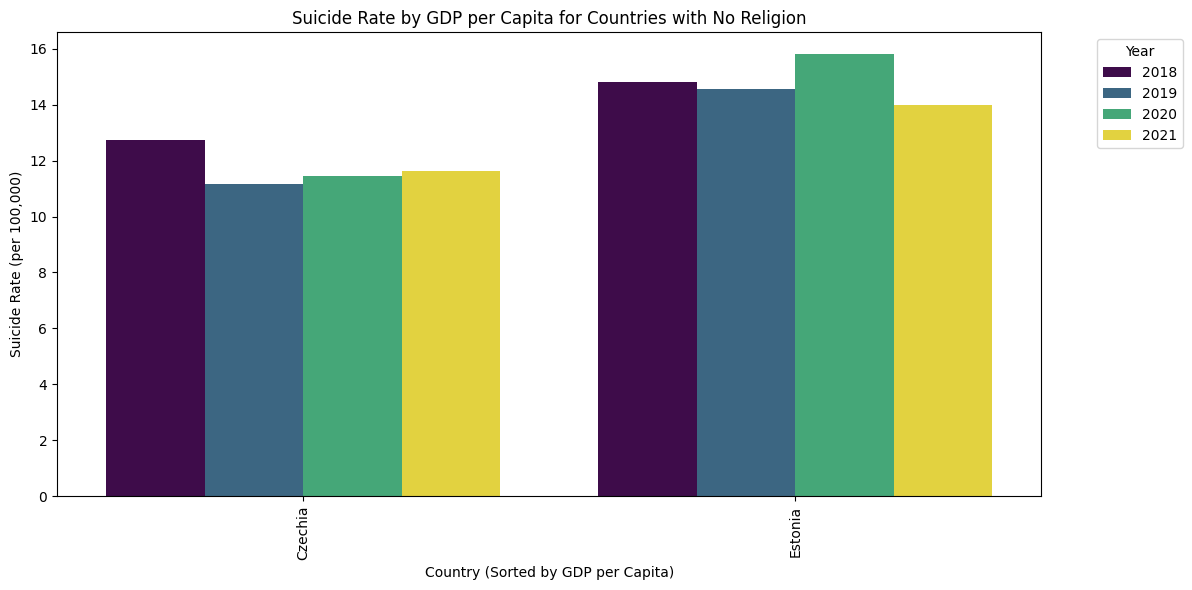

In [21]:
grouped_by_no_religion = countries_with_all_years_only[countries_with_all_years_only['Religions'] == "No Religion"]

# Sort countries within the group based on average GDP per capita
sorted_countries = grouped_by_no_religion.groupby('CountryName')['GDPPerCapita'].mean().sort_values().index

# Plot the bar graph for the filtered group
plt.figure(figsize=(12, 6))
sns.barplot(x='CountryName', y='SuicideRate', hue='Year', data=grouped_by_no_religion, order=sorted_countries, palette='viridis')
plt.title('Suicide Rate by GDP per Capita for Countries with No Religion')
plt.xlabel('Country (Sorted by GDP per Capita)')
plt.ylabel('Suicide Rate (per 100,000)')
plt.xticks(rotation=90)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.tight_layout()
plt.show()

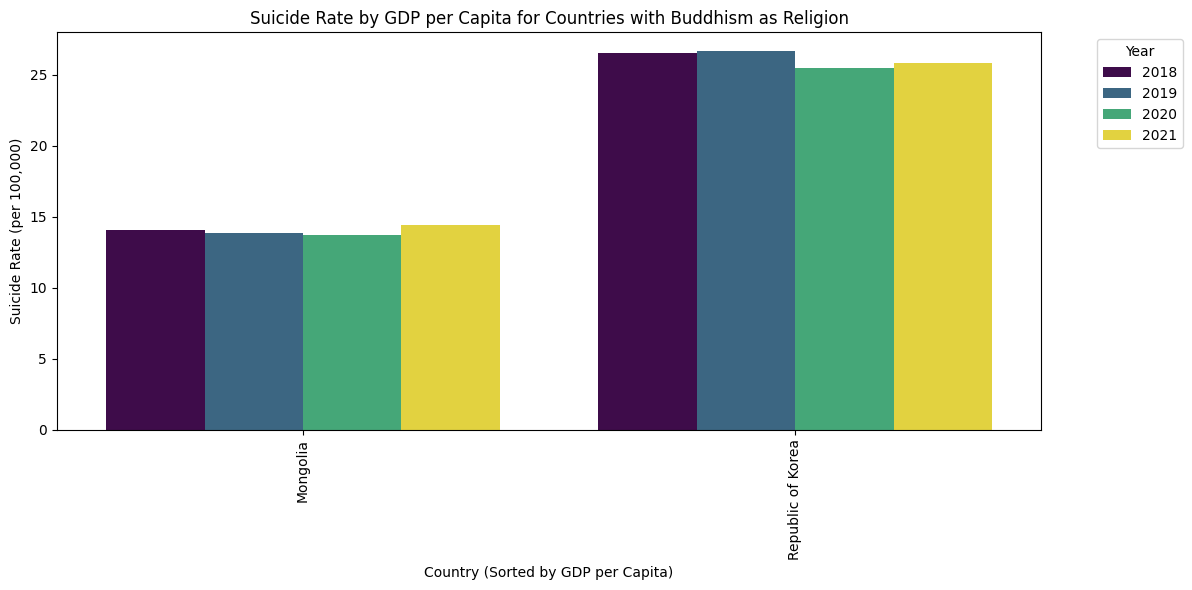

In [22]:
grouped_by_buddhism = countries_with_all_years_only[countries_with_all_years_only['Religions'] == "Buddhism"]

# Sort countries within the group based on average GDP per capita
sorted_countries = grouped_by_buddhism.groupby('CountryName')['GDPPerCapita'].mean().sort_values().index

# Plot the bar graph for the filtered group
plt.figure(figsize=(12, 6))
sns.barplot(x='CountryName', y='SuicideRate', hue='Year', data=grouped_by_buddhism, order=sorted_countries, palette='viridis')
plt.title('Suicide Rate by GDP per Capita for Countries with Buddhism as Religion')
plt.xlabel('Country (Sorted by GDP per Capita)')
plt.ylabel('Suicide Rate (per 100,000)')
plt.xticks(rotation=90)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")
plt.tight_layout()
plt.show()

##**Observation**
Religion, offers deep insights into the factors influencing suicide rates. By affecting social support systems, coping mechanisms, and attitudes toward mental health, religious backgrounds can play a critical role in either mitigating or exacerbating the risk of suicide. Understanding these complex interactions is essential for developing effective prevention strategies that are sensitive to the cultural and religious contexts of different populations.

###**Conclusion 3 :**
Religion has a profound impact on suicide rates, with different religious groups exhibiting varying rates of suicide. The protective effects seen in some religions, such as Islam and Toism, suggest that strong community support, cohesive cultural practices, and positive coping mechanisms associated with these religions may help lower suicide rates. Conversely, the higher rates observed in religions like Buddhism indicate that there may be unique cultural or social factors at play that warrant further investigation.